# Reading Cycleways from OpenStreetMap and composing a network

In [1]:
import geopandas as gpd
import pandas

In [2]:
# https://download.geofabrik.de/south-america/brazil/sudeste-latest-free.shp.zip
# Copy all of the files regarding roads to data/
all_roads_df = gpd.read_file('data/gis_osm_roads_free_1.shp')

In [3]:
all_roads_df.head()

osm_id  code       fclass                    name   ref oneway  maxspeed  \
0  4217292  5122  residential  Rua Vinícius de Moraes  None      F         0   
1  4217293  5122  residential      Rua Joana Angélica  None      F         0   
2  4217294  5122  residential     Rua Farme de Amoedo  None      B         0   
3  4217295  5122  residential    Rua Teixeira de Melo  None      F         0   
4  4217297  5122  residential      Rua Maria Quitéria  None      F         0   

   layer bridge tunnel                                           geometry  
0      0      F      F  LINESTRING (-43.20306 -22.98656, -43.20303 -22...  
1      0      F      F  LINESTRING (-43.20518 -22.98645, -43.20516 -22...  
2      0      F      F  LINESTRING (-43.20048 -22.98079, -43.20051 -22...  
3      0      F      F  LINESTRING (-43.19878 -22.98678, -43.19873 -22...  
4      0      F      F  LINESTRING (-43.20643 -22.98045, -43.20664 -22...

In [4]:
# Filter to fetch cycleways
cycleways_df = all_roads_df[all_roads_df['fclass'] == 'cycleway']
cycleways_df.head()

osm_id  code    fclass                     name   ref oneway  \
9075   24602288  5152  cycleway                     None  None      B   
9125   24602362  5152  cycleway                     None  None      B   
10623  27293000  5152  cycleway  Ciclovia Mané Garrincha  None      B   
10625  27293246  5152  cycleway                     None  None      B   
10627  27293406  5152  cycleway                 Tricolor  None      B   

       maxspeed  layer bridge tunnel  \
9075          0      1      T      F   
9125          0      0      F      F   
10623         0      0      F      F   
10625         0      0      F      F   
10627         0      0      F      F   

                                                geometry  
9075   LINESTRING (-40.49948 -20.66804, -40.49875 -20...  
9125   LINESTRING (-40.50058 -20.66471, -40.50060 -20...  
10623  LINESTRING (-43.17351 -22.96488, -43.17349 -22...  
10625  LINESTRING (-43.16967 -22.93850, -43.16974 -22...  
10627  LINESTRING (-43.18540 -22.93652, -43.18424 -22...

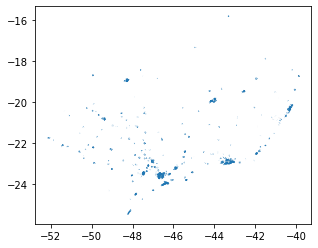

In [5]:
cycleways_df.plot()

In [6]:
# http://dados.prefeitura.sp.gov.br/dataset/af41e7c4-ae27-4bfc-9938-170151af7aee/resource/9e75c2f7-5729-4398-8a83-b4640f072b5d/download/layerdistrito.zip
# Copy all of the files regarding SP District to data/
sp_district = gpd.read_file('data/DEINFO_DISTRITO.shp')

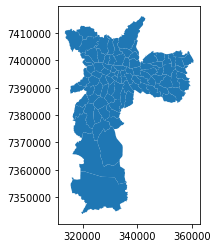

In [7]:
sp_district.geometry.plot()

In [8]:
# Converts current projection to latlong using epsg codes
# http://processamentodigital.com.br/2013/07/27/lista-dos-codigos-epsg-mais-utilizados-no-brasil/

desired_proj = "+init=epsg:4326" # Latlong
sp_district.crs = '+init=epsg:29193' # SAD69
sp_latlong = sp_district.to_crs(desired_proj)

/home/victorcmoura/.virtualenvs/bikes/lib/python3.7/site-packages/pyproj/crs.py:422: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  projstring = _prepare_from_string(projparams)


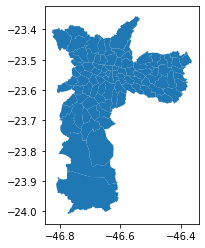

In [9]:
sp_latlong.geometry.plot()

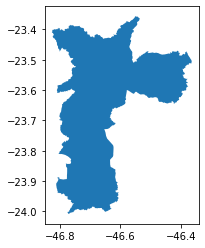

In [10]:
# Joining all of the district polygons into a single SP polygon (SP Boundary)

from shapely.ops import cascaded_union

sp_district_polygons = sp_latlong.geometry.to_list()
sp_boundary = gpd.GeoSeries(cascaded_union(sp_district_polygons))
sp_boundary.plot()

In [11]:
# Selecting cycleways within SP boundaries

sp_district_cycleways = cycleways_df[cycleways_df.geometry.within(sp_boundary.iloc[0])]

In [ ]:
cycleways_df.iloc[0].geometry.within(sp_boundary.iloc[0])

In [12]:
sp_district_cycleways.head()

osm_id  code    fclass                          name   ref oneway  \
11012  27570952  5152  cycleway                          None  None      B   
37232  38937645  5152  cycleway         Ciclovia Radial Leste  None      B   
61613  51388704  5152  cycleway                          None  None      B   
61621  51392018  5152  cycleway  Rua Inácio de Almeida Arruda  None      B   
61622  51392253  5152  cycleway     Ciclovia do Rio Pinheiros  None      B   

       maxspeed  layer bridge tunnel  \
11012         0      0      F      F   
37232         0      0      F      F   
61613         0      0      F      F   
61621         0      0      F      F   
61622         0      0      F      F   

                                                geometry  
11012  LINESTRING (-46.71764 -23.63457, -46.71659 -23...  
37232  LINESTRING (-46.55790 -23.53666, -46.56001 -23...  
61613  LINESTRING (-46.73428 -23.54573, -46.73462 -23...  
61621  LINESTRING (-46.68394 -23.70746, -46.68386 -23...  
61622  LINESTRING (-46.73428 -23.54573, -46.73376 -23...

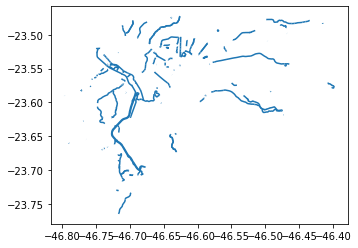

In [13]:
sp_district_cycleways.plot()

In [14]:
# Converting coordinates from LatLong to SAD69

simulator_proj = '+init=epsg:29193'
sp_district_cycleways_SAD69 = sp_district_cycleways.to_crs(simulator_proj)

/home/victorcmoura/.virtualenvs/bikes/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/victorcmoura/.virtualenvs/bikes/lib/python3.7/site-packages/pyproj/crs.py:422: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  projstring = _prepare_from_string(projparams)


In [15]:
sp_district_cycleways_SAD69.head()

osm_id  code    fclass                          name   ref oneway  \
11012  27570952  5152  cycleway                          None  None      B   
37232  38937645  5152  cycleway         Ciclovia Radial Leste  None      B   
61613  51388704  5152  cycleway                          None  None      B   
61621  51392018  5152  cycleway  Rua Inácio de Almeida Arruda  None      B   
61622  51392253  5152  cycleway     Ciclovia do Rio Pinheiros  None      B   

       maxspeed  layer bridge tunnel  \
11012         0      0      F      F   
37232         0      0      F      F   
61613         0      0      F      F   
61621         0      0      F      F   
61622         0      0      F      F   

                                                geometry  
11012  LINESTRING (324833.836 7385223.090, 324941.770...  
37232  LINESTRING (341012.638 7396252.926, 340798.433...  
61613  LINESTRING (323016.933 7395042.031, 322981.486...  
61621  LINESTRING (328366.993 7377192.130, 328375.537...  
61622  LINESTRING (323016.933 7395042.031, 323069.909...

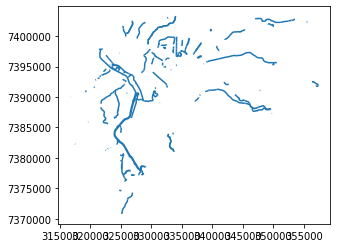

In [16]:
sp_district_cycleways_SAD69.plot()

# Gathering all roads within SP

In [64]:
# # Generating the file (Takes some time to finish operation. If you already have data/sp_roads.shp, dont run this)
# sp_roads_df = all_roads_df[all_roads_df.geometry.within(sp_boundary.iloc[0])]
# sp_roads_df.to_file('data/sp_roads.shp')

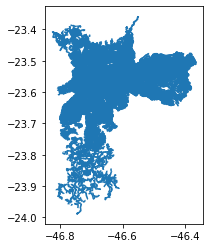

In [2]:
sp_roads_gdf = gpd.read_file('data/sp_roads.shp')
sp_roads_gdf.plot()

# Composing the graph

In [4]:
# Numbers got from:
# https://github.com/matsim-org/matsim/blob/610b1b65cd8f1551668a7bf4d8b66cf05c520e89/contribs/vsp/src/main/java/playground/vsp/andreas/utils/net/OSM2MATSim.java
matsim_categories = {
    'motorway':{
        'permlanes': 2,
        'freespeed': (100/3.6) * 1.2,
        'capacity': 2000
    },
    'motorway_link':{
        'permlanes': 1,
        'freespeed': (60/3.6) * 1.2,
        'capacity': 1500
    },
    'trunk':{
        'permlanes': 2,
        'freespeed': (50/3.6) * 0.5,
        'capacity': 1000
    },
    'trunk_link':{
        'permlanes': 1,
        'freespeed': (50/3.6) * 0.5,
        'capacity': 1000
    },
    'primary':{
        'permlanes': 1,
        'freespeed': (50/3.6) * 0.5,
        'capacity': 1000
    },
    'primary_link':{
        'permlanes': 1,
        'freespeed': (50/3.6) * 0.5,
        'capacity': 1000
    },
    'secondary':{
        'permlanes': 1,
        'freespeed': (50/3.6) * 0.5,
        'capacity': 1000
    },
    'tertiary':{
        'permlanes': 1,
        'freespeed': (30/3.6) * 0.8,
        'capacity': 600
    },
    'minor':{
        'permlanes': 1,
        'freespeed': (30/3.6) * 0.8,
        'capacity': 600
    },
    'unclassified':{
        'permlanes': 1,
        'freespeed': (30/3.6) * 0.8,
        'capacity': 600
    },
    'residential':{
        'permlanes': 1,
        'freespeed': (30/3.6) * 0.6,
        'capacity': 600
    },
    'living_street':{
        'permlanes': 1,
        'freespeed': (15/3.6) * 1,
        'capacity': 300
    },
    'cycleway':{
        'permlanes': 1,
        'freespeed': (14/3.6) * 1,
        'capacity': 300
    },
    'pedestrian':{
        'permlanes': 1,
        'freespeed': (3/3.6) * 1,
        'capacity': 300
    },
    'footway':{
        'permlanes': 1,
        'freespeed': (3/3.6) * 1,
        'capacity': 300
    },
    'service':{
        'permlanes': 1,
        'freespeed': (3/3.6) * 1,
        'capacity': 300
    },
    'steps':{
        'permlanes': 1,
        'freespeed': (3/3.6) * 1,
        'capacity': 300
    }
}

In [11]:
from math import radians, degrees, sin, cos, asin, acos, sqrt
def distance_great_circle(p1, p2):
    lon1, lat1, lon2, lat2 = map(radians, [p1[1], p1[0], p2[1], p2[0]])
    try:
        return 6371000 * (
            acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2))
        )
    except ValueError:
        return 1

edges = []
nodes = set()
nodes_list = []
nodes_index = {}

index = 1

# Making edges tuples
for link in sp_roads_gdf.iterrows():
    link = link[1]
    
    node1 = link['geometry'].coords[0]
    node2 = link['geometry'].coords[1]
    
    if node1 not in nodes:
        nodes.add(node1)
        nodes_list.append(
            {'id': index, 'x': node1[0], 'y': node1[1]}
        )
        nodes_index[node1] = index
        index+=1
    
    if node2 not in nodes:
        nodes.add(node2)
        nodes_list.append(
            {'id': index, 'x': node2[0], 'y': node2[1]}
        )
        nodes_index[node2] = index
        index+=1
    
    try:
        link_data = matsim_categories[link['fclass']]
    except KeyError:
        link_data = matsim_categories['unclassified']
        
    if link['oneway'] == 'F':
        # Only in the direction of line is allowed
        edges.append({
            'id': index + 1000000, 
            'from': nodes_index[node1], 
            'to': nodes_index[node2],
            'length': distance_great_circle(node1, node2),
            'freespeed': link_data['freespeed'],
            'capacity': link_data['capacity'],
            'permlanes': link_data['permlanes'],
            'oneway': 1,
            'modes': 'car',
            'origid': link['osm_id'],
            'type': link['fclass']
        })
        index+=1
    elif link['oneway'] == 'T':
        # Only in the opposite direction of line is allowed
        edges.append({
            'id': index + 1000000, 
            'from': nodes_index[node2], 
            'to': nodes_index[node1],
            'length': distance_great_circle(node1, node2),
            'freespeed': link_data['freespeed'],
            'capacity': link_data['capacity'],
            'permlanes': link_data['permlanes'],
            'oneway': 1,
            'modes': 'car',
            'origid': link['osm_id'],
            'type': link['fclass']
        })
        index+=1
    elif link['oneway'] == 'B':
        # Both directions allowed
        edges.append({
            'id': index + 1000000, 
            'from': nodes_index[node1], 
            'to': nodes_index[node2],
            'length': distance_great_circle(node1, node2),
            'freespeed': link_data['freespeed'],
            'capacity': link_data['capacity'],
            'permlanes': link_data['permlanes'],
            'oneway': 1,
            'modes': 'car',
            'origid': link['osm_id'],
            'type': link['fclass']
        })
        index+=1
        edges.append({
            'id': index + 1000000, 
            'from': nodes_index[node2], 
            'to': nodes_index[node1],
            'length': distance_great_circle(node1, node2),
            'freespeed': link_data['freespeed'],
            'capacity': link_data['capacity'],
            'permlanes': link_data['permlanes'],
            'oneway': 1,
            'modes': 'car',
            'origid': link['osm_id'],
            'type': link['fclass']
        })
        index+=1

# Converting to XML

In [19]:
import xml.etree.ElementTree as ET

network_xml = ET.Element('network')

nodes_xml = ET.SubElement(network_xml, 'nodes')

links_xml = ET.SubElement(network_xml, 'links')
links_xml.set('capperiod', '01:00:00')
links_xml.set('effectivecellsize', '7.5')
links_xml.set('effectivelanewidth', '3.75')

for node in nodes_list:
    n = ET.SubElement(nodes_xml, 'node')
    n.set('id', str(node['id']))
    n.set('x', str(node['x']))
    n.set('y', str(node['y']))
    
for link in edges:
    l = ET.SubElement(links_xml, 'link')
    l.set('id', str(link['id']))
    l.set('from', str(link['from']))
    l.set('to', str(link['to']))
    l.set('length', str(link['length']))
    l.set('freespeed', str(link['freespeed']))
    l.set('capacity', str(link['capacity']))
    l.set('permlanes', str(link['permlanes']))
    l.set('oneway', str(link['oneway']))
    l.set('modes', str(link['modes']))
    
    attrs = ET.SubElement(l, 'attributes')
    
    attr_origid = ET.SubElement(attrs, 'attribute')
    attr_origid.set('name', 'origid')
    attr_origid.set('class', 'java.lang.String')
    attr_origid.text = str(link['origid'])
    
    attr_type = ET.SubElement(attrs, 'attribute')
    attr_type.set('name', 'type')
    attr_type.set('class', 'java.lang.String')
    attr_type.text = link['type']

In [20]:
xml_string = ET.tostring(network_xml)

In [25]:
file = open('network.xml', 'wb')
header = """<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE network SYSTEM "http://www.matsim.org/files/dtd/network_v2.dtd">\n"""
final_xml = xml_string
file.write(final_xml)

65973956